<a href="https://colab.research.google.com/github/Aleena24/Predictive_Analysis/blob/main/PA_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi-Factor Classification of User Behavior**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/user_behavior_dataset.csv")

In [ ]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
print(data.isnull().sum())

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
# Feature scaling
scaler = StandardScaler()
data[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']] = scaler.fit_transform(
    data[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']])

In [ ]:
# Encoding categorical variables
encoder = OneHotEncoder()
transformed_data = pd.get_dummies(data, columns=['Device Model', 'Operating System', 'Gender'])

In [ ]:
transformed_data.head()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,1,0.688256,0.367626,0.423726,67,0.300405,40,4,True,False,False,False,False,True,False,False,True
1,2,-0.017668,-0.186771,-0.237198,42,0.022277,47,3,False,True,False,False,False,True,False,True,False
2,3,-0.661471,-0.415053,-0.933550,32,-0.949607,42,2,False,False,False,True,False,True,False,False,True
3,4,-0.181443,-0.154160,0.184279,56,-0.091787,20,3,True,False,False,False,False,True,False,False,True
4,5,-0.475107,-0.317218,-0.193218,58,0.091028,31,3,False,False,False,False,True,False,True,True,False


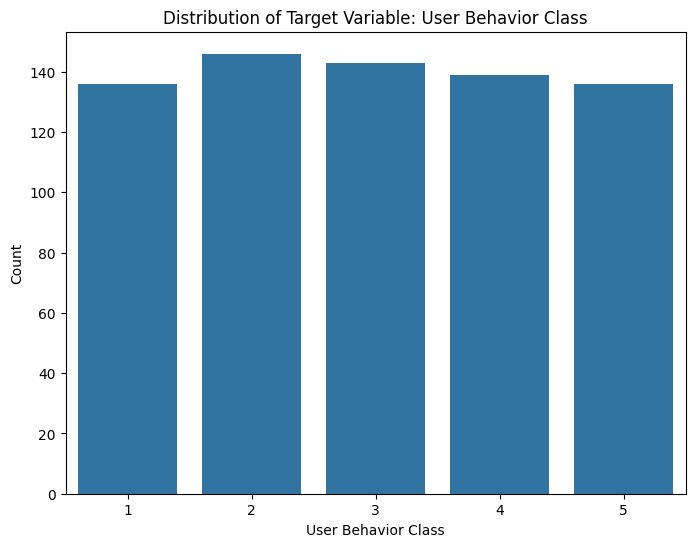

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


In [ ]:
# Assuming 'User Behavior Class' is your target column
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', data=transformed_data)
plt.title('Distribution of Target Variable: User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.show()

# Print value counts for the target variable
print(transformed_data['User Behavior Class'].value_counts())

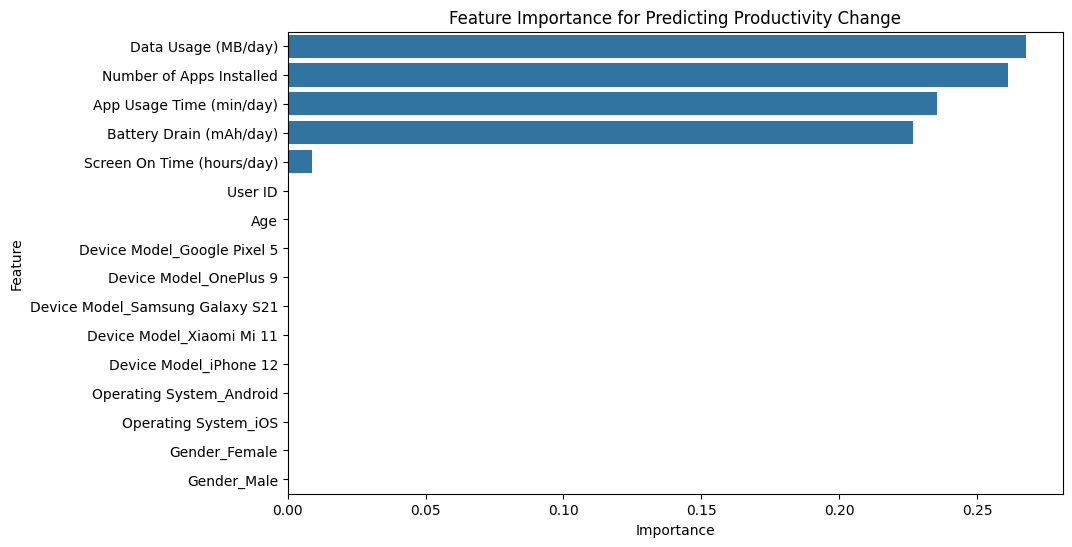

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


X = transformed_data.drop(['User Behavior Class'], axis=1)
y = transformed_data['User Behavior Class']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance for Predicting Productivity Change')
plt.show()


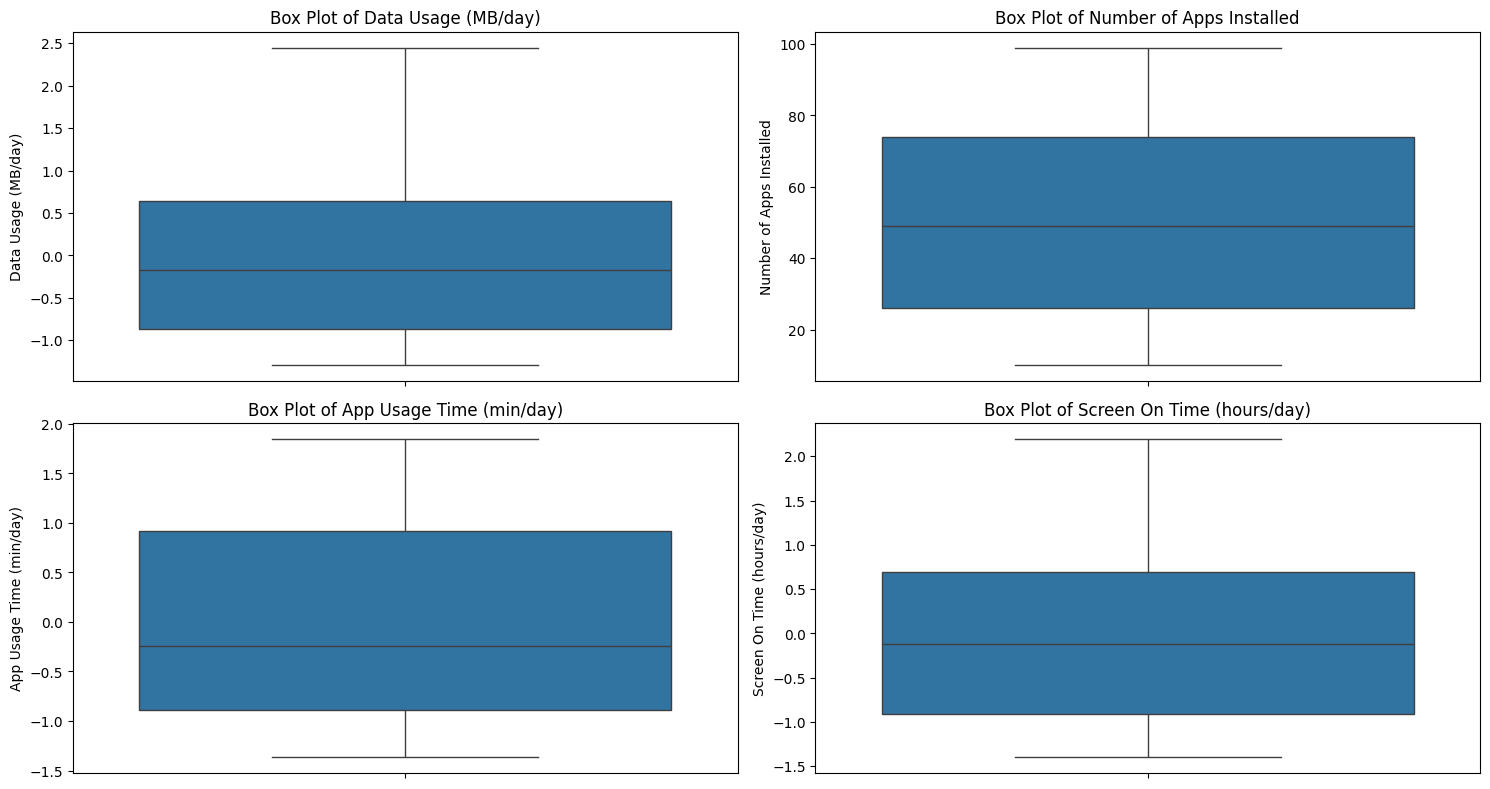

In [ ]:
columns_to_check = ['Data Usage (MB/day)', 'Number of Apps Installed', 'App Usage Time (min/day)', 'Screen On Time (hours/day)']

# Box plots to visually inspect outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=transformed_data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

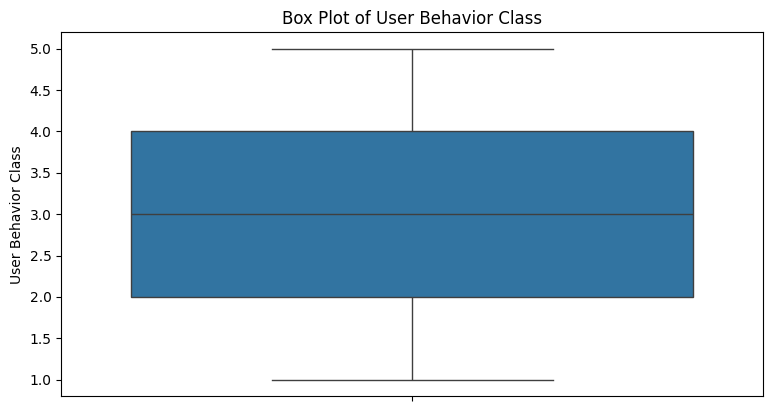

In [ ]:
columns_to_check = ['User Behavior Class']

# Box plots to visually inspect outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=transformed_data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Define features and target
X = transformed_data[['Data Usage (MB/day)','Number of Apps Installed','App Usage Time (min/day)','Screen On Time (hours/day)']]
y = transformed_data['User Behavior Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)


Best Hyperparameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix: 
[[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
ROC-AUC Score: 1.0


In [ ]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test data: {accuracy:.2f}")

Accuracy on test data: 1.00
